In [1]:
###: Importing H2O Library

In [2]:
import h2o

In [3]:
### : Initializing h2O

In [4]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 3 hours 25 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_avkashchauhan_1ocjkz
H2O cluster total nodes:,1
H2O cluster free memory:,3.263 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [5]:
###: Importing Dataset

In [6]:
iris_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/iris.csv", 
                          col_names=["sepal_length", "sepal_width", "petal_length", "petal_width", "iris_class"])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
###: Understanding Dataset

In [8]:
iris_df.describe()

Rows:150
Cols:5




,sepal_length,sepal_width,petal_length,petal_width,iris_class
type,real,real,real,real,enum
mins,4.3,2.0,1.0,0.1,
mean,5.84333333333,3.054,3.75866666667,1.19866666667,
maxs,7.9,4.4,6.9,2.5,
sigma,0.828066127978,0.433594311362,1.76442041995,0.763160741701,
zeros,0,0,0,0,
missing,0,0,0,0,0
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [9]:
###: Visualizing Dataset

In [10]:
iris_df

sepal_length,sepal_width,petal_length,petal_width,iris_class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
###: Setting response columns as factor

In [12]:
iris_df['iris_class'] = iris_df['iris_class'].asfactor()

In [13]:
###: Getting the list of classes in the response column

In [14]:
iris_df['iris_class'].levels()

[['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']]

In [15]:
###: Setting Response column

In [16]:
response = "iris_class"

In [17]:
###: Settings all features for model building

In [18]:
features= iris_df.col_names
features.remove(response)
print(features)

[u'sepal_length', u'sepal_width', u'petal_length', u'petal_width']


In [19]:
###: Importing H2O GBM library

In [20]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [21]:
###: Setting H2O GBM model configuration

In [22]:
iris_gbm = H2OGradientBoostingEstimator(nfolds = 5,
                  distribution="AUTO",
                   ntrees=10,
                   max_depth=3,
                   min_rows=2,
                   learn_rate=0.2,
                   keep_cross_validation_predictions=True,
                   seed = 9090
)

In [23]:
###: Training H2O GBM Model

In [24]:
iris_gbm.train(x = features, y = response, training_frame=iris_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [25]:
###: Getting Model details

In [26]:
iris_gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1510608322538_7007


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.00976685303214
RMSE: 0.0988273900907
LogLoss: 0.0782480973696
Mean Per-Class Error: 0.00666666666667
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
50.0,0.0,0.0,0.0,0 / 50
0.0,49.0,1.0,0.02,1 / 50
0.0,0.0,50.0,0.0,0 / 50
50.0,49.0,51.0,0.0066667,1 / 150


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9933333
2,1.0
3,1.0



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.044011053568
RMSE: 0.209788115888
LogLoss: 0.186998544047
Mean Per-Class Error: 0.0466666666667
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
50.0,0.0,0.0,0.0,0 / 50
0.0,45.0,5.0,0.1,5 / 50
0.0,2.0,48.0,0.04,2 / 50
50.0,47.0,53.0,0.0466667,7 / 150


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9533333
2,0.9933333
3,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9543108,0.0086312,0.9393939,0.9642857,0.9655172,0.962963,0.9393939
err,0.0456892,0.0086312,0.0606061,0.0357143,0.0344828,0.0370370,0.0606061
err_count,1.4,0.3464102,2.0,1.0,1.0,1.0,2.0
logloss,0.1858276,0.0297258,0.2629135,0.1509837,0.1713898,0.1952162,0.1486348
max_per_class_error,0.1435065,0.0514208,0.125,0.0909091,0.0909091,0.125,0.2857143
mean_per_class_accuracy,0.9521645,0.0171403,0.9583333,0.969697,0.969697,0.9583333,0.9047619
mean_per_class_error,0.0478355,0.0171403,0.0416667,0.0303030,0.0303030,0.0416667,0.0952381
mse,0.0435585,0.0059118,0.0600169,0.0403763,0.0368059,0.0393992,0.0411944
r2,0.9316378,0.0172152,0.8832886,0.9460732,0.9407017,0.9404108,0.9477148
rmse,0.2078454,0.0133946,0.2449835,0.2009387,0.1918485,0.1984923,0.2029640


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
,2017-11-14 16:51:22,0.031 sec,0.0,0.6666667,1.0986123,0.64
,2017-11-14 16:51:22,0.033 sec,1.0,0.5313437,0.7584115,0.0266667
,2017-11-14 16:51:22,0.034 sec,2.0,0.4233365,0.5505065,0.0266667
,2017-11-14 16:51:22,0.035 sec,3.0,0.3390480,0.4121733,0.0266667
,2017-11-14 16:51:22,0.036 sec,4.0,0.2728966,0.3135394,0.02
,2017-11-14 16:51:22,0.037 sec,5.0,0.2232307,0.2435139,0.02
,2017-11-14 16:51:22,0.039 sec,6.0,0.1846307,0.1909104,0.0066667
,2017-11-14 16:51:22,0.040 sec,7.0,0.1552645,0.1513943,0.0066667
,2017-11-14 16:51:22,0.041 sec,8.0,0.1326877,0.1208821,0.0066667
,2017-11-14 16:51:22,0.042 sec,9.0,0.1144659,0.0975897,0.0066667


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
petal_width,192.7606354,1.0,0.7743739
petal_length,54.0381165,0.2803379,0.2170864
sepal_length,1.3527106,0.0070176,0.0054342
sepal_width,0.7730322,0.0040103,0.0031055


In [27]:
###: Getting model performance based on cross validation

In [28]:
iris_gbm.model_performance(xval=True)


ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.044011053568
RMSE: 0.209788115888
LogLoss: 0.186998544047
Mean Per-Class Error: 0.0466666666667
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
50.0,0.0,0.0,0.0,0 / 50
0.0,45.0,5.0,0.1,5 / 50
0.0,2.0,48.0,0.04,2 / 50
50.0,47.0,53.0,0.0466667,7 / 150


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9533333
2,0.9933333
3,1.0


In [29]:
###: Creating a test data frame to perform prediction

In [30]:
df_test = h2o.H2OFrame.from_python({"sepal_length":3.4, "sepal_width" : 3.2, "petal_length" : 1.4, "petal_width" : 3.2})


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [31]:
df_test

sepal_width,petal_width,sepal_length,petal_length
3.2,3.2,3.4,1.4


In [32]:
###: Performing prediction using GBM model we built earlier

In [33]:
iris_gbm.predict(test_data=df_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-virginica,0.161365,0.0811296,0.757505


In [34]:
iris_gbm.model_performance(xval=True)


ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.044011053568
RMSE: 0.209788115888
LogLoss: 0.186998544047
Mean Per-Class Error: 0.0466666666667
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
50.0,0.0,0.0,0.0,0 / 50
0.0,45.0,5.0,0.1,5 / 50
0.0,2.0,48.0,0.04,2 / 50
50.0,47.0,53.0,0.0466667,7 / 150


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9533333
2,0.9933333
3,1.0


In [35]:
###: Plotting Variable Importance graph

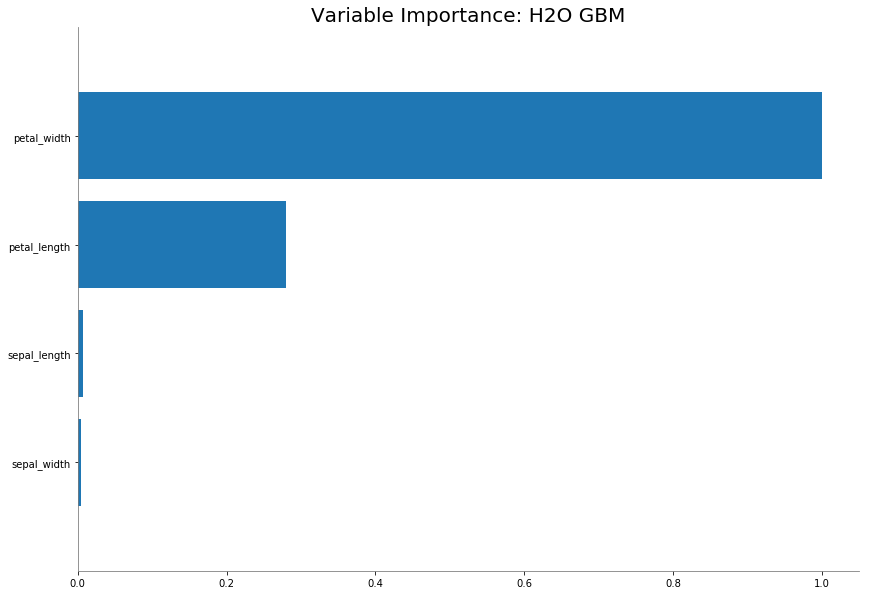

In [36]:
iris_gbm.varimp_plot()

In [37]:
###: Generating Variable Importance Table

In [38]:
iris_gbm.varimp()

[(u'petal_width', 192.76063537597656, 1.0, 0.7743739147368136),
 (u'petal_length',
  54.038116455078125,
  0.28033792454396944,
  0.21708637607830708),
 (u'sepal_length',
  1.3527106046676636,
  0.007017566641805382,
  0.005434220552341308),
 (u'sepal_width',
  0.7730321884155273,
  0.004010321852839613,
  0.003105488632538003)]

In [39]:
###: Generating Training Scoring History Plot

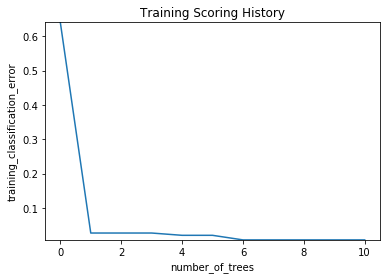

In [40]:
iris_gbm.plot()

In [41]:
###: Generating Scoring History details per tree

In [42]:
iris_gbm.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
0,,2017-11-14 16:51:22,0.031 sec,0.0,0.666667,1.098612,0.640000
1,,2017-11-14 16:51:22,0.033 sec,1.0,0.531344,0.758411,0.026667
2,,2017-11-14 16:51:22,0.034 sec,2.0,0.423337,0.550506,0.026667
3,,2017-11-14 16:51:22,0.035 sec,3.0,0.339048,0.412173,0.026667
4,,2017-11-14 16:51:22,0.036 sec,4.0,0.272897,0.313539,0.020000
5,,2017-11-14 16:51:22,0.037 sec,5.0,0.223231,0.243514,0.020000
6,,2017-11-14 16:51:22,0.039 sec,6.0,0.184631,0.190910,0.006667
7,,2017-11-14 16:51:22,0.040 sec,7.0,0.155265,0.151394,0.006667
8,,2017-11-14 16:51:22,0.041 sec,8.0,0.132688,0.120882,0.006667
9,,2017-11-14 16:51:22,0.042 sec,9.0,0.114466,0.097590,0.006667


In [43]:
###: Generating Scoring History details per tree

In [44]:
iris_gbm.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
0,,2017-11-14 16:51:22,0.031 sec,0.0,0.666667,1.098612,0.640000
1,,2017-11-14 16:51:22,0.033 sec,1.0,0.531344,0.758411,0.026667
2,,2017-11-14 16:51:22,0.034 sec,2.0,0.423337,0.550506,0.026667
3,,2017-11-14 16:51:22,0.035 sec,3.0,0.339048,0.412173,0.026667
4,,2017-11-14 16:51:22,0.036 sec,4.0,0.272897,0.313539,0.020000
5,,2017-11-14 16:51:22,0.037 sec,5.0,0.223231,0.243514,0.020000
6,,2017-11-14 16:51:22,0.039 sec,6.0,0.184631,0.190910,0.006667
7,,2017-11-14 16:51:22,0.040 sec,7.0,0.155265,0.151394,0.006667
8,,2017-11-14 16:51:22,0.041 sec,8.0,0.132688,0.120882,0.006667
9,,2017-11-14 16:51:22,0.042 sec,9.0,0.114466,0.097590,0.006667
